# DataViz Project - Airplane Crashes Since 1908

## 2. Exploratory Data Analysis

### 2.1. The clean dataset

From the previous step, we can now use a clean version of the original dataset.

In [127]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


file_path = "dataset/dataset_final.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 11 columns):
Date          5265 non-null object
Time          3069 non-null object
Location      5265 non-null object
Latitude      5265 non-null float64
Longitude     5265 non-null float64
Operator      5247 non-null object
Type          5240 non-null object
Aboard        5265 non-null int64
Fatalities    5265 non-null int64
Ground        5265 non-null int64
Summary       5265 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 452.5+ KB


['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


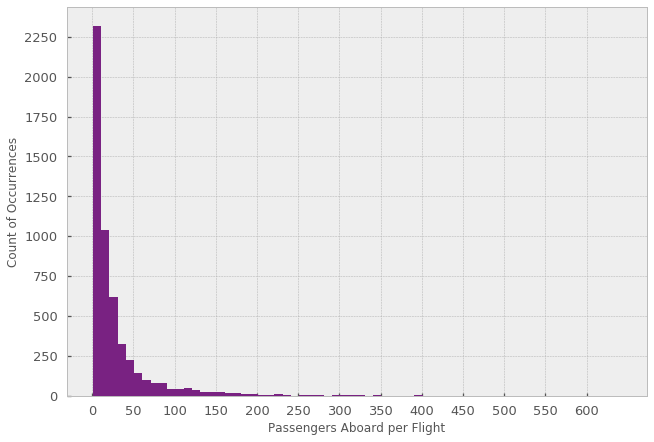

In [67]:
print(plt.style.available)
mp.style.use("bmh")

#colors
# to change default colormap
plt.rcParams["image.cmap"] = "magma"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.magma.colors[90:-16])

df["Aboard"].hist(bins = range(df["Aboard"].min(), df["Aboard"].max(), 10))
plt.ylabel("Count of Occurrences")
plt.xlabel("Passengers Aboard per Flight")
plt.yticks(range(0, 2500, 250))
plt.xticks(range(0, 650, 50))
plt.show()



In [68]:
len(plt.cm.magma.colors[90:-16])

150

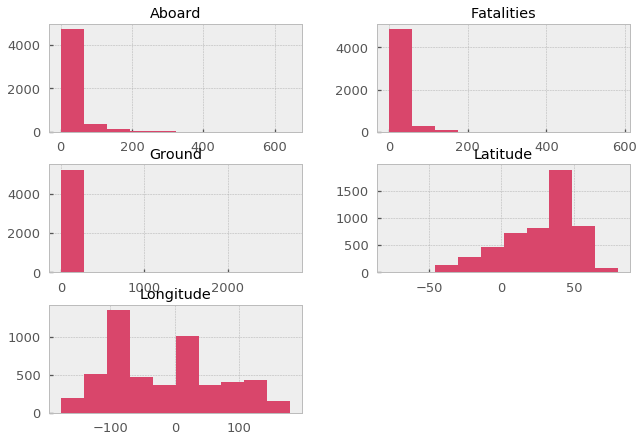

In [69]:
df.hist(color=plt.cm.magma.colors[150:151])
plt.show()

In [131]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
df["Date"].head() 

0   1908-09-17
1   1912-07-12
2   1913-08-06
3   1913-09-09
4   1913-10-17
Name: Date, dtype: datetime64[ns]

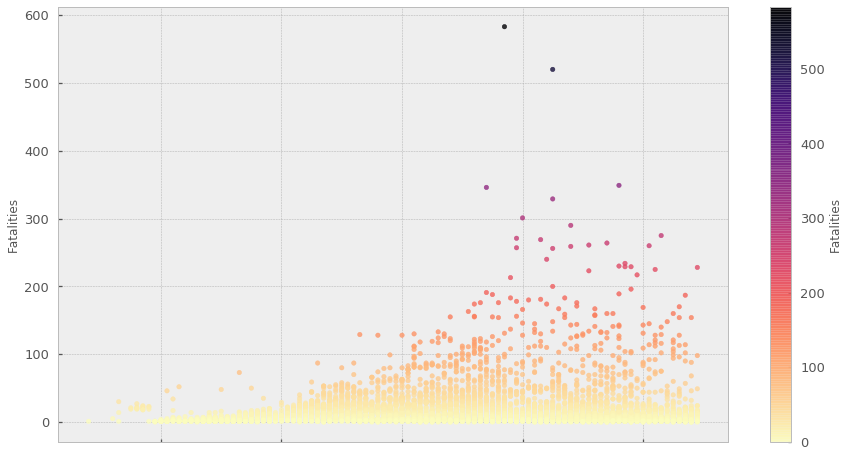

In [99]:
year = df.Date.dt.year
fatalities = df.Fatalities
d={"Year": year, "Fatalities": fatalities}

fatalities_year = pd.DataFrame(data=d)
fatalities_year
fatalities_year.plot.scatter(x="Year",y="Fatalities", 
                             c='Fatalities', cmap='magma_r', alpha=0.8,
                             figsize=(15,8)
                            )
plt.show()

#TODO: aggregate fatalities and ground for a more figure of deaths by accident

In [161]:
#Number of accidents recorded by year
crashes_year = df.groupby(df.Date.dt.year)[["Date"]].count()
crashes_year = crashes_year.rename(columns={"Date": "Count"})
fatalities_year = df.groupby(df.Date.dt.year)[["Fatalities"]].sum()

dfy = crashes_year.join(fatalities_year)

print(dfy.head())


      Count  Fatalities
Date                   
1908      1           1
1912      1           5
1913      3          45
1915      2          40
1916      5         108


In [163]:
#year with most crashes
dfy[(dfy["Count"] == dfy.Count.max())]

,Count,Fatalities
Date,,
1972,104,2937


In [170]:
#year with most fatalities
dfy[(dfy["Fatalities"] == dfy.Fatalities.max())]

,Count,Fatalities
Date,,
1972,104,2937


The year with the most crashes was also the year with most fatalities recorded: 1972.

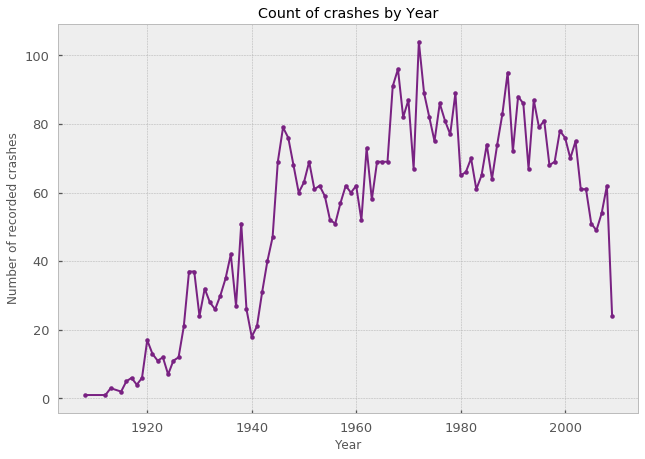

In [168]:
plt.plot(crashes_year.index, 'Count', data=crashes_year, marker = ".")
plt.xlabel('Year')
plt.ylabel('Number of recorded crashes')
plt.title('Count of crashes by Year', loc='Center')
plt.show()

/Users/catarina/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


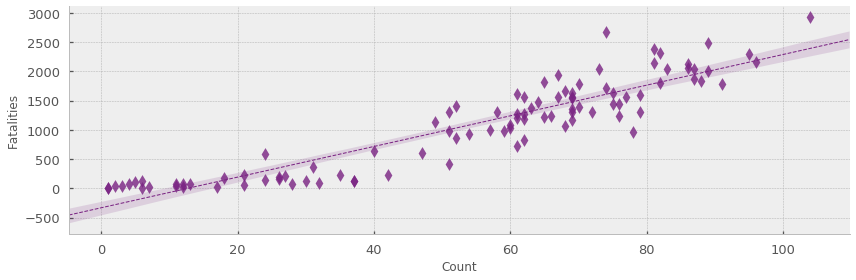

In [172]:
#try out regression using seaborn
sns.lmplot("Count", "Fatalities", dfy, 
           size=4, aspect=3, markers="d",
           line_kws={"linewidth":1, "linestyle": '--'}
           )
plt.savefig("mpl_scatter_fatalyear.svg")

Pretty much as expected, the more plain crashes in a given year, the more fatalities.

In [82]:
#Saving our plot as an image...
plt.savefig("Plots/fatalities_year_scatter.png")

<Figure size 748.8x514.8 with 0 Axes>

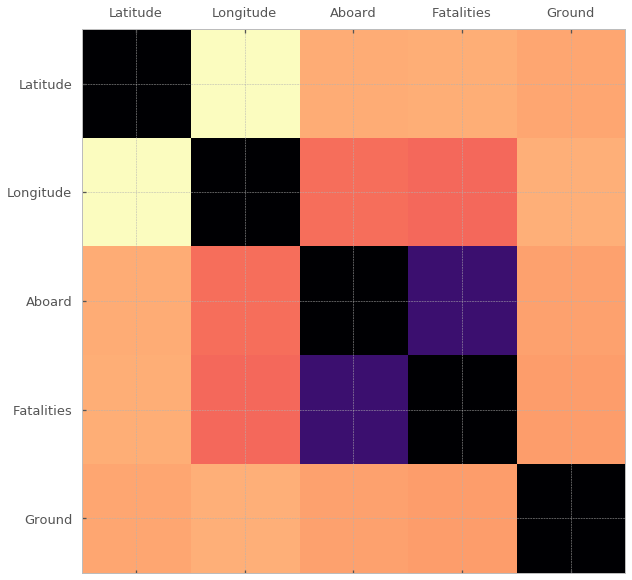

In [92]:
plt.rcParams["image.cmap"] = "magma_r"
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(df)

There seems to be an (unexpected!) correlation between number of fatalities and Longitude of the crash.